In [2]:
import ipynb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle
from scipy import signal
# import neurokit2 as nk
import random
# %matplotlib inline 
import pyhrv
import ipynb

from ipynb.fs.full.ECG_features import get_ecgfeatures
from ipynb.fs.full.EDA import get_eda_features_and_index

c:\Users\riche\AppData\Local\Programs\Python\Python39\lib\site-packages\antropy\fractal.py:197: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('float64(float64[:], int32)')


In [3]:
class read_data_of_one_subject:
            """Read data from WESAD dataset"""
            def __init__(self, path, subject):
                self.keys = ['label', 'subject', 'signal']
                self.signal_keys = ['wrist', 'chest']
                self.chest_sensor_keys = ['ACC', 'ECG', 'EDA', 'EMG', 'Resp', 'Temp']
                self.wrist_sensor_keys = ['ACC', 'BVP', 'EDA', 'TEMP']
                #os.chdir(path)
                #os.chdir(subject)
                with open(path + subject +'/'+subject + '.pkl', 'rb') as file:
                    data = pickle.load(file, encoding='latin1')
                self.data = data

            def get_labels(self):
                return self.data[self.keys[0]]

            def get_wrist_data(self):
                """"""
                #label = self.data[self.keys[0]]
                assert subject == self.data[self.keys[1]]
                signal = self.data[self.keys[2]]
                wrist_data = signal[self.signal_keys[0]]
                #wrist_ACC = wrist_data[self.wrist_sensor_keys[0]]
                #wrist_ECG = wrist_data[self.wrist_sensor_keys[1]]
                return wrist_data

            def get_chest_data(self):
                """"""
                signal = self.data[self.keys[2]]
                chest_data = signal[self.signal_keys[1]]
                return chest_data

In [5]:
ecgfeatures = pd.DataFrame(None, columns= ['feat_rmssd', 'feat_nnhr', 
                                    'feat_sdsd', 'feat_pnn50', 'feat_pnn20', 'peak vlf', 'peak lf','peak hf', 'norm power lf', 
                                    'norm power hf', 'power ratio', 'total power'])
edafeatures = None

fs = 700
y = []
data_set_path= "C:/Users/riche/Downloads/WESAD/WESAD/" # Folder path

for i in range(16): # 16
    subject = 'S'+str(i+2) # Cycle through S2 to S17
    print(subject)
    if subject != 'S12': # Skip S12, because it does nog exist
        for label in range(1,5):

            # print(label)
            if label==3 or label==4:
                y.append(1)
            else:
                y.append(label)

            # Object instantiation
            obj_data = {}

            # Accessing class attributes and method through objects
            obj_data[subject] = read_data_of_one_subject(data_set_path, subject)

            chest_data_dict = obj_data[subject].get_chest_data()
            chest_dict_length = {key: len(value) for key, value in chest_data_dict.items()}
            #print(chest_dict_length)

            # Get labels
            labels = obj_data[subject].get_labels()
            baseline = np.asarray([idx for idx,val in enumerate(labels) if val == label])
            #plt.plot(labels)

            eda_base=chest_data_dict['EDA'][baseline,0] # Select the EDA data
            ecg_base=chest_data_dict['ECG'][baseline,0]
            resp_base=chest_data_dict['Resp'][baseline,0]

            edafeatures, start, end = get_eda_features_and_index(eda_base, fs, subject, label, edafeatures)

            # print(start, end)

            ecg = ecg_base[start: end]
            resp = ecg_base[start: end]

            ecgfeatures = get_ecgfeatures(ecg, fs, subject, label, ecgfeatures)
            # t=np.arange(0,eda_base.size*(1/fs),(1/fs))
            # t=t[:eda_base.size]
            
            # plt.figure(figsize=(12,4))
            # plt.plot(t, eda_base)
            # plt.xlabel('$Time (s)$') 
            # plt.ylabel('$signal$')


S2
S3
S4
S5
S6
S7
S8
S9
S10
S11
S12
S13
S14
S15
S16
S17


In [6]:
edafeatures.to_csv("EDA_features.csv")
ecgfeatures.to_csv("ECG_features.csv")

In [10]:
features = pd.merge(ecgfeatures, edafeatures, left_index=True, right_index=True)
features.to_csv("out_features.csv")

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm

In [12]:
df_features = features
print(len(y), features.shape)
features.keys()

60 (60, 41)


Index(['feat_rmssd', 'feat_nnhr', 'feat_sdsd', 'feat_pnn50', 'feat_pnn20',
       'peak vlf', 'peak lf', 'peak hf', 'norm power lf', 'norm power hf',
       'power ratio', 'total power', 'scr_mean', 'scr_std', 'scr_max',
       'scr_min', 'scr_range', 'scr_kurtosis', 'scr_skew', 'scr_momentum',
       'scr_activity', 'scr_complexity', 'scr_mobility', 'scr_rms',
       'scr_acr_length', 'scr_integral', 'scr_average_power', 'scr_f1sc',
       'scr_f2sc', 'scr_f3sc', 'scr_Energy', 'scr_Entropy', 'scr_max_freq',
       'scl_mean', 'scl_std', 'scl_max', 'scl_min', 'scl_range',
       'scl_kurtosis', 'scl_skew', 'scl_momentum'],
      dtype='object')

In [ ]:
# score=[]
# print(df_features.shape)
# for i in range (1,50):
#     X_train, X_test, y_train, y_test = train_test_split(df_features, y, test_size=0.3, random_state=i)
#     scaler = StandardScaler().fit(X_train)
#     X_train = scaler.transform(X_train)
#     X_test = scaler.transform(X_test)
#     pca = PCA(n_components=7)
#     pca =pca.fit(X_train)
#     X_train = pca.transform(X_train)
#     X_test = pca.transform(X_test)
#     model = LogisticRegression()
#     model.fit(X_train, y_train)
#     score.append(model.score(X_test, y_test))
# print(score)
# print(np.mean(score))

In [13]:
X_train, X_test, y_train, y_test = features[0:56], features[56:], y[0:56], y[56:]

# X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=4)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Performing PCA

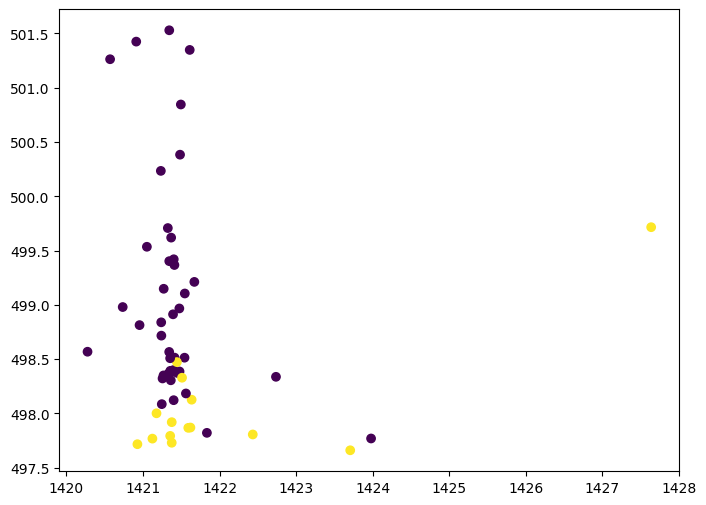

In [17]:
pca = PCA(n_components=25)
pca.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train)

# Logistic Regression

In [18]:
scaler = StandardScaler().fit(X_train)
logistic_model = LogisticRegression()
logistic_model.fit(X_train_pca, y_train)
score = logistic_model.score(X_test_pca,y_test)
print(score)

1.0


c:\Users\riche\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# SVM

In [19]:
from sklearn import datasets, svm
svm_model = svm.SVC()
svm_model.fit(X_train_pca, y_train)
score = svm_model.score(X_test_pca,y_test)
print(score)

0.75


# Neural Networks

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(df_features, y, test_size=0.3, random_state=4)
X_train, X_test, y_train, y_test = features[0:56], features[56:], y[0:56], y[56:]

# Scale the data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=15)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Convert labels to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the feedforward neural network
neural_model = Sequential()
neural_model.add(Dense(64, activation='relu', input_shape=(15,)))
neural_model.add(Dense(64, activation='relu'))
neural_model.add(Dense(32, activation='relu'))
neural_model.add(Dense(100, activation = 'relu'))
neural_model.add(Dropout(0.5))
neural_model.add(Dense(3, activation='softmax'))
from tensorflow.keras.optimizers import Adam
# Compile the model
optimizer = Adam(learning_rate=0.001)
neural_model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Train the model
# history = model.fit(X_train_pca, y_train, validation_data=(X_test_pca, y_test), epochs=45, batch_size=100, verbose=2)
val_accuracies = []
for i in range(1):
    # ... your code ...
    history = neural_model.fit(X_train_pca, y_train, validation_data=(X_test_pca, y_test), epochs=45, batch_size=100, verbose=0)
    val_accuracy = history.history['val_accuracy'][-1]
    val_accuracies.append(val_accuracy)

avg_val_accuracy = sum(val_accuracies) / len(val_accuracies)
print("Average Validation Accuracy:", avg_val_accuracy)


Average Validation Accuracy: 1.0


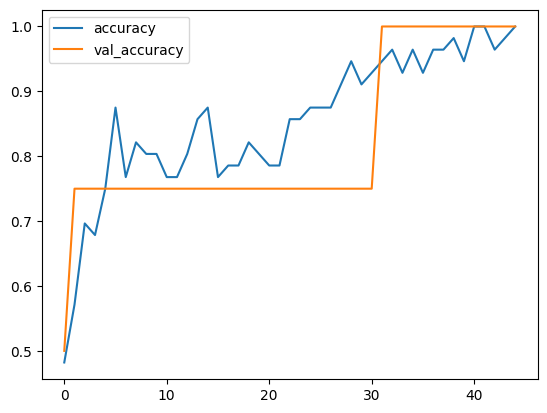

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])

In [27]:
def model_predict(X_test, y_test, model):
    predictions = model.predict(X_test)
    predictions = np.argmax(predictions, axis = 1)
    y_test1 = y_test.astype('int64')
    testYarg = np.argmax(y_test1, axis = 1)
    miss_class = np.where(predictions - testYarg !=0)
    miss_class = miss_class[0]
    return predictions, miss_class

In [28]:
predictions, miss_class = model_predict(X_test_pca, y_test, neural_model)
print(miss_class)
print(predictions)

1/1 [==============================] - 0s 96ms/step
[]
[1 2 1 1]


# Random forest method

[2, 7, 13, 9, 5]


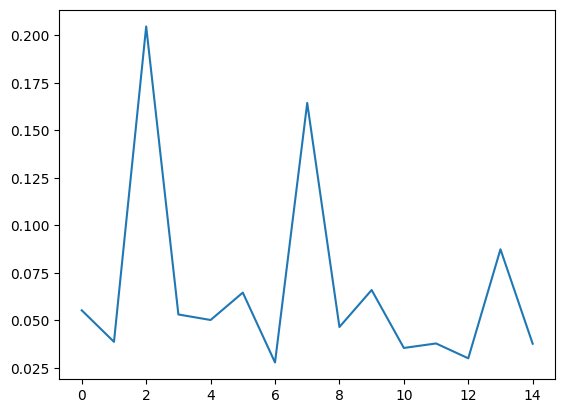

In [29]:
#from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# define the model
randomf_model = RandomForestClassifier()

# fit/train the model on all features
randomf_model.fit(X_train_pca, y_train)

#score
score=randomf_model.score(X_test_pca, y_test)

# get feature importance
importance = randomf_model.feature_importances_

#creat a dictionary with key=indices, and values=importance
important_features_dict = {}
for idx, val in enumerate(importance):
    important_features_dict[idx] = val
# sorting 
important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)
# print indices of top 5 features
print(important_features_list[:5])
plt.plot(importance)

# Cross-validation score of different models

In [33]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
def cross_validation(X, y, model):
    cv = KFold(n_splits= 5, random_state=1, shuffle=True)
    scores = cross_val_score(model, X,y, scoring='accuracy', cv=cv, n_jobs=-1)
    print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
    return scores

In [34]:
cv_logistic = cross_validation(features, y, logistic_model)
print(cv_logistic)
# cv_neural = cross_validation(features, y, neural_model)
# print(cv_neural)
cv_randomf = cross_validation(features, y, randomf_model)
print(cv_randomf)

Accuracy: 0.667 (0.253)
[0.75       0.16666667 0.83333333 0.75       0.83333333]
Accuracy: 0.867 (0.113)
[0.83333333 1.         0.91666667 0.66666667 0.91666667]
